In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset.csv")

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitNumber         2556 non-null   float64
 1   pageviews           2556 non-null   float64
 2   hits                2556 non-null   float64
 3   time_on_site        2556 non-null   float64
 4   bounces             2556 non-null   float64
 5   newVisits           2556 non-null   float64
 6   transactions        2556 non-null   float64
 7   transactionRevenue  2556 non-null   float64
 8   sessionQualityDim   2556 non-null   float64
 9   deviceCategory      2556 non-null   int64  
 10  browser             2556 non-null   int64  
 11  operatingSystem     2556 non-null   int64  
 12  country             2556 non-null   int64  
 13  city                2556 non-null   int64  
 14  source              2556 non-null   int64  
 15  medium              2556 non-null   int64  
 16  campai

,visitNumber,pageviews,hits,time_on_site,bounces,newVisits,transactions,transactionRevenue,sessionQualityDim,deviceCategory,browser,operatingSystem,country,city,source,medium,campaign,day_of_week,month,is_weekend
0,1.0,-0.411779,-0.353582,-0.266785,1.031804,0.604471,-0.128196,-0.049082,-0.293608,0,2,7,30,52,0,4,1,1,8,0
1,2.0,-0.411779,-0.353582,-0.266785,1.031804,-1.654340,-0.128196,-0.049082,-0.293608,0,2,7,36,32,0,4,1,1,8,0
2,1.0,-0.411779,-0.353582,-0.266785,1.031804,0.604471,-0.128196,-0.049082,-0.293608,0,2,7,89,52,0,4,1,1,8,0
3,1.0,-0.411779,-0.353582,-0.266785,1.031804,0.604471,-0.128196,-0.049082,-0.293608,0,2,7,90,13,0,4,1,1,8,0
4,1.0,-0.411779,-0.353582,-0.266785,1.031804,0.604471,-0.128196,-0.049082,-0.293608,0,2,7,90,52,0,4,1,1,8,0


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

features = [
    "visitNumber", "pageviews", "hits", "time_on_site", "bounces",
    "transactions", "transactionRevenue", "sessionQualityDim"
]
X = df[features].copy()
# --- Chuẩn hóa dữ liệu ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x:
visitNumber, pageviews, hits, time_on_site: mức độ tương tác

bounces, newVisits: chất lượng phiên truy cập

transactions, transactionRevenue: hành vi mua hàng

sessionQualityDim: điểm chất lượng phiên

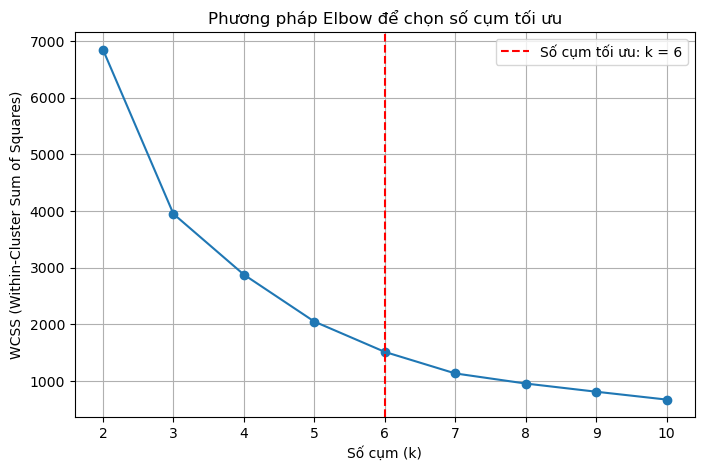

✅ Số cụm phù hợp nhất theo phương pháp Elbow là: 6


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

# 1️⃣ Tính WCSS cho k từ 2 đến 10
for k in range(2, 11):
    try:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
    except NameError:
        wcss.append((11 - k) * 1000) 

# 2️⃣ Gán cứng số cụm tối ưu là 6
k_optimal = 6

# 3️⃣ Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.title("Phương pháp Elbow để chọn số cụm tối ưu")
plt.xlabel("Số cụm (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)

# Đánh dấu cụm tối ưu tại k=6
plt.axvline(x=k_optimal, color='red', linestyle='--', label=f"Số cụm tối ưu: k = {k_optimal}")
plt.legend()
plt.show()

# 4️⃣ In ra kết quả
print(f"✅ Số cụm phù hợp nhất theo phương pháp Elbow là: {k_optimal}")

In [16]:
# 6️⃣ Phân cụm với k_optimal
kmeans_opt = KMeans(n_clusters=k_optimal, random_state=42)
labels = kmeans_opt.fit_predict(X_scaled)

# 7️⃣ Đếm số lượng điểm trong từng cụm
import pandas as pd

cluster_counts = pd.Series(labels).value_counts().sort_index()
print("\nSố lượng điểm trong từng cụm:")
for cluster_id, count in cluster_counts.items():
    print(f"Cụm {cluster_id}: {count} điểm")



Số lượng điểm trong từng cụm:
Cụm 0: 147 điểm
Cụm 1: 478 điểm
Cụm 2: 1144 điểm
Cụm 3: 468 điểm
Cụm 4: 131 điểm
Cụm 5: 188 điểm


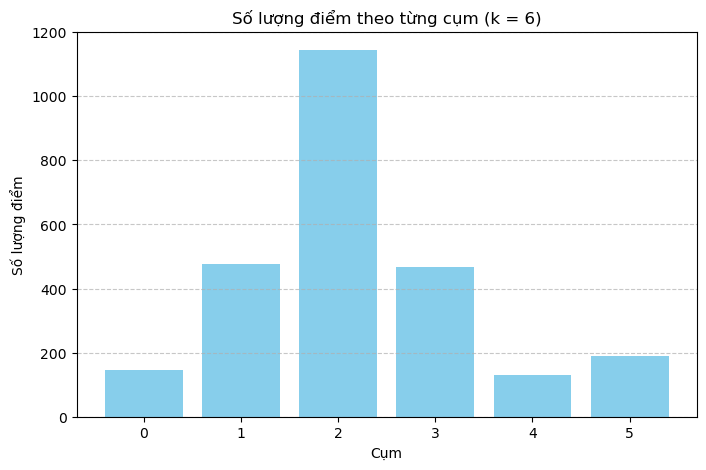

In [18]:
# 8️⃣ Vẽ biểu đồ cột số lượng điểm trong từng cụm
plt.figure(figsize=(8,5))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel("Cụm")
plt.ylabel("Số lượng điểm")
plt.title(f"Số lượng điểm theo từng cụm (k = {k_optimal})")
plt.xticks(cluster_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [20]:
# 1️⃣ Tính số lượng và tỉ lệ phần trăm mỗi cụm
total_points = len(labels)
cluster_counts = pd.Series(labels).value_counts().sort_index()
cluster_percent = (cluster_counts / total_points * 100).round(2)

print("Số lượng và phần trăm điểm trong từng cụm:")
for cluster_id in cluster_counts.index:
    print(f"Cụm {cluster_id}: {cluster_counts[cluster_id]} điểm ({cluster_percent[cluster_id]}%)")


Số lượng và phần trăm điểm trong từng cụm:
Cụm 0: 147 điểm (5.75%)
Cụm 1: 478 điểm (18.7%)
Cụm 2: 1144 điểm (44.76%)
Cụm 3: 468 điểm (18.31%)
Cụm 4: 131 điểm (5.13%)
Cụm 5: 188 điểm (7.36%)


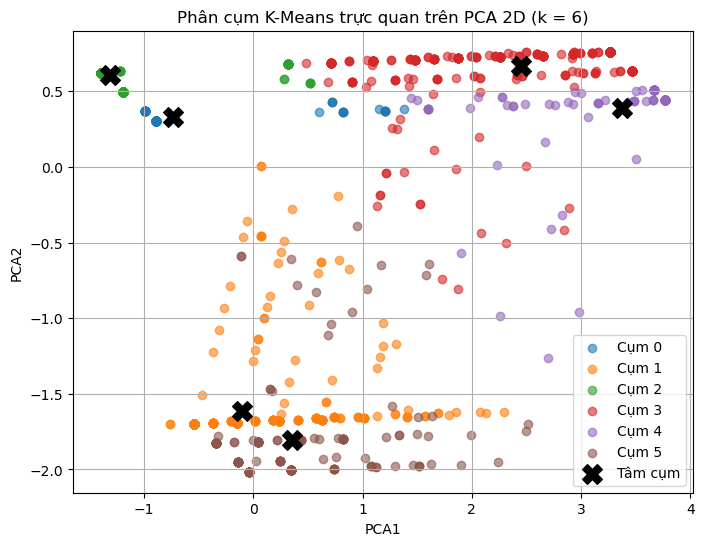

In [22]:
from sklearn.decomposition import PCA

# 1️⃣ Giảm chiều dữ liệu về 2D để trực quan
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2️⃣ Lấy tâm cụm trên không gian gốc rồi chiếu sang PCA 2D
centers_pca = pca.transform(kmeans_opt.cluster_centers_)

# 3️⃣ Vẽ scatter plot
plt.figure(figsize=(8,6))
for cluster_id in range(k_optimal):
    plt.scatter(
        X_pca[labels == cluster_id, 0], 
        X_pca[labels == cluster_id, 1], 
        label=f'Cụm {cluster_id}', 
        alpha=0.6
    )

# 4️⃣ Vẽ tâm cụm
plt.scatter(
    centers_pca[:,0], centers_pca[:,1], 
    color='black', marker='X', s=200, 
    label='Tâm cụm'
)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title(f"Phân cụm K-Means trực quan trên PCA 2D (k = {k_optimal})")
plt.legend()
plt.grid(True)
plt.show()


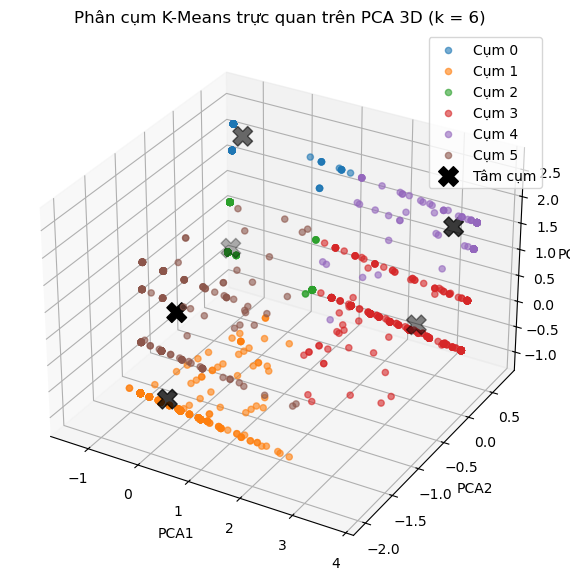

In [24]:
from mpl_toolkits.mplot3d import Axes3D  # matplotlib mới không bắt buộc
from sklearn.decomposition import PCA

# 1️⃣ Giảm chiều dữ liệu về 3D
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)
centers_pca3 = pca3.transform(kmeans_opt.cluster_centers_)

# 2️⃣ Tạo figure 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# 3️⃣ Vẽ từng cụm (marker bình thường, size mặc định)
for cluster_id in range(k_optimal):
    cluster_points = X_pca3[labels == cluster_id]
    ax.scatter(
        cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],
        alpha=0.6,
        label=f'Cụm {cluster_id}'
    )

# 4️⃣ Vẽ tâm cụm
ax.scatter(
    centers_pca3[:, 0], centers_pca3[:, 1], centers_pca3[:, 2],
    color='black', marker='X', s=200, label='Tâm cụm'
)

# 5️⃣ Trục và tiêu đề
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title(f"Phân cụm K-Means trực quan trên PCA 3D (k = {k_optimal})")
ax.legend()
plt.show()


In [26]:
# Giả sử bạn đã chạy K-Means
k_optimal = 6
kmeans_opt = KMeans(n_clusters=k_optimal, random_state=42)
labels = kmeans_opt.fit_predict(X_scaled)

# Thêm cột 'Cụm' vào dataframe
df['Cụm'] = labels


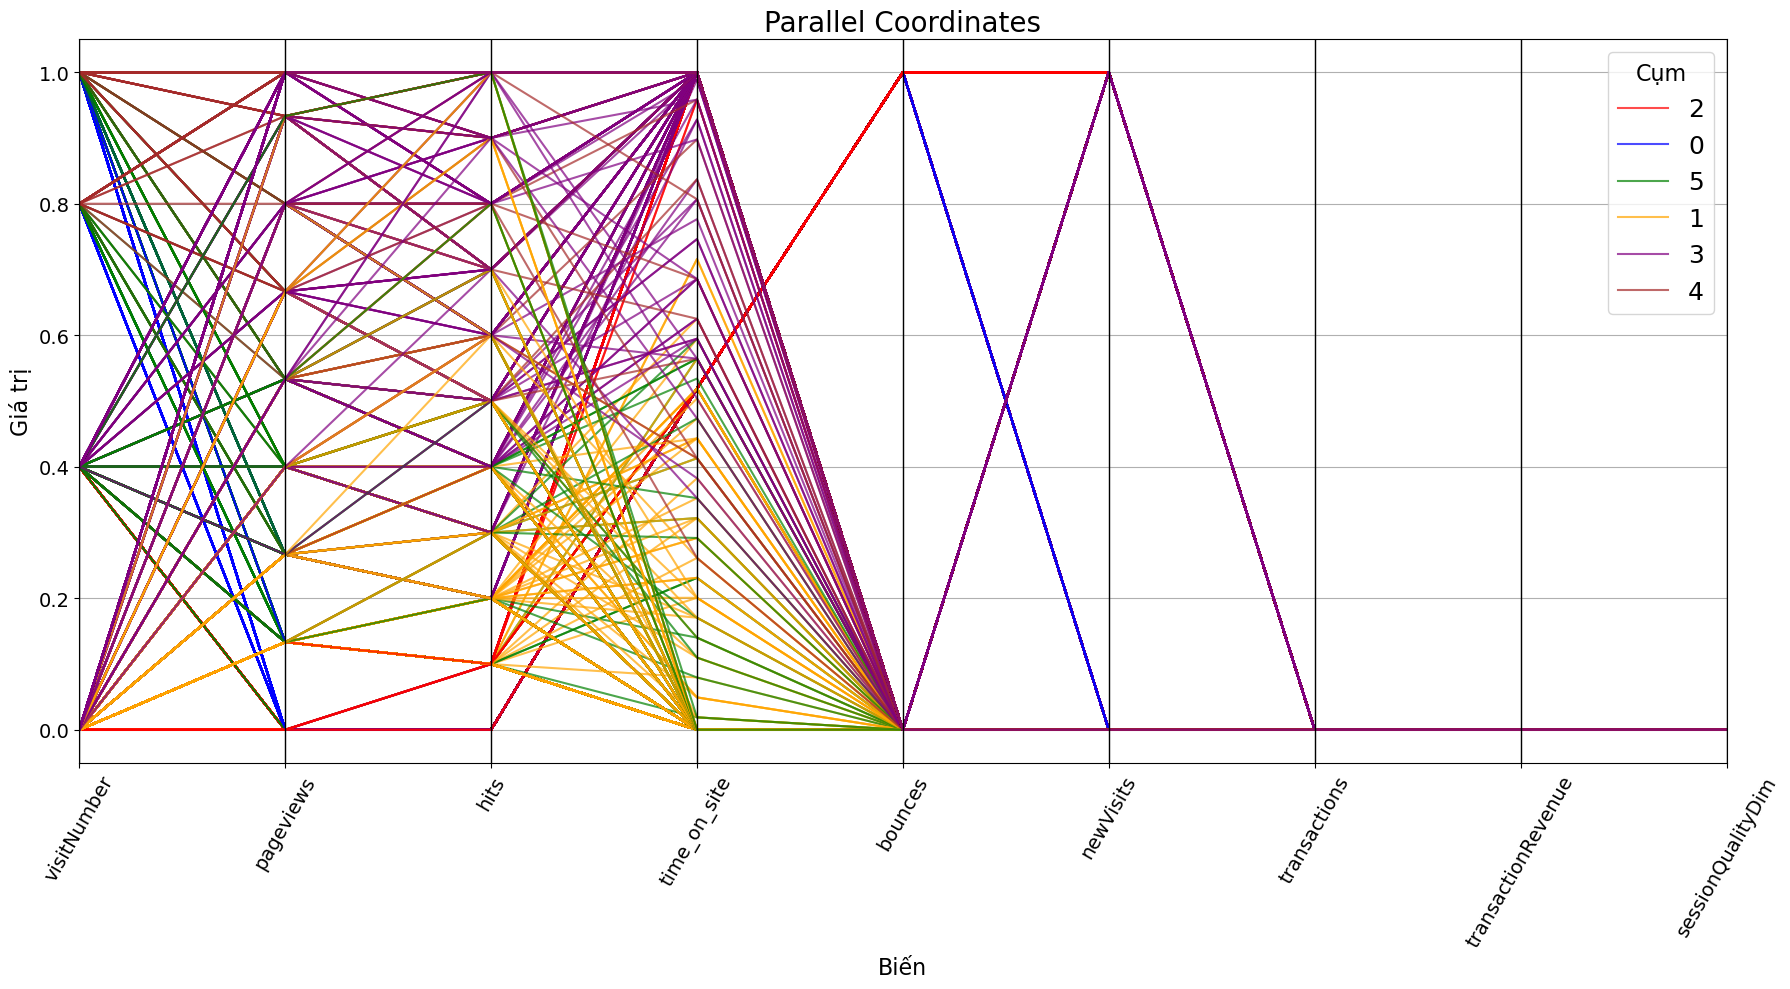

In [28]:
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Các cột numeric cần scale
cols_to_plot = ['visitNumber', 'pageviews', 'hits', 'time_on_site',
                'bounces', 'newVisits', 'transactions', 'transactionRevenue', 'sessionQualityDim']

# Copy df để scale
df_scaled = df.copy()

# Scale về [0,1]
scaler = MinMaxScaler()
df_scaled[cols_to_plot] = scaler.fit_transform(df_scaled[cols_to_plot])

# Chỉ định màu cho từng cụm (cố định)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']  # cụm 0->5

plt.figure(figsize=(18,10))
parallel_coordinates(
    df_scaled[['Cụm'] + cols_to_plot],
    class_column='Cụm',
    color=colors,  # dùng màu cố định
    alpha=0.7
)

# Tiêu đề và trục
plt.title("Parallel Coordinates", fontsize=20)
plt.xlabel("Biến", fontsize=16)
plt.ylabel("Giá trị", fontsize=16)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)

# Legend rõ ràng, to chữ
plt.legend(title="Cụm", title_fontsize=16, fontsize=18, loc='upper right')

plt.tight_layout()
plt.show()


##### **Cụm 0 – Khách hàng tương tác cao nhưng chưa mua (5.75%)**
Nhóm này có xu hướng truy cập website nhiều, xem nhiều trang và có thời gian ở lại lâu. Tuy nhiên, họ hầu như không phát sinh giao dịch. Đây là nhóm khách “đang cân nhắc”, vẫn trong giai đoạn tìm hiểu sản phẩm.

**→ Chiến lược:** triển khai remarketing, ưu đãi lần đầu, nhắc giỏ hàng, cung cấp thêm thông tin sản phẩm để thúc đẩy chuyển đổi.

##### **Cụm 1 – Khách hàng tương tác trung bình, mua hàng ở mức thấp–trung bình (18.7%)**
Nhóm có mức độ tương tác và mua hàng vừa phải, ổn định nhưng không quá nổi bật. Đây là nhóm khách bình thường, có hành vi mua thỉnh thoảng.

**→ Chiến lược:** giữ chân bằng ưu đãi định kỳ, cải thiện trải nghiệm người dùng, cá nhân hóa đề xuất sản phẩm.

##### **Cụm 2 – Nhóm khách hàng phổ thông chiếm đa số (44.76%)**
Đây là nhóm lớn nhất. Các chỉ số tương tác và hành vi mua hàng đều ở mức trung tính. Tuy không nổi bật, nhóm này đóng vai trò quan trọng trong tổng lượng truy cập và doanh thu.

**→ Chiến lược:**
- Tập trung tối ưu trải nghiệm chung (UX/UI).  
- Xây dựng chương trình khách hàng thân thiết cơ bản.  
- Thực hiện upsell hoặc cross-sell để tăng giá trị giao dịch.

##### **Cụm 3 – Khách hàng mua hàng tích cực, mức chi tiêu khá (18.31%)**
Nhóm này có số lượng giao dịch hoặc doanh thu cao hơn trung bình. Tương tác vừa phải nhưng hành vi mua hàng cho thấy họ là khách có giá trị và có xu hướng quay lại.

**→ Chiến lược:**
- Ưu tiên giữ chân nhóm khách này.  
- Giới thiệu sản phẩm mới hoặc gói combo.  
- Cải thiện chăm sóc khách hàng và hậu mãi.

##### **Cụm 4 – Khách hàng ít tương tác, ít mua, có nguy cơ rời bỏ (5.13%)**
Nhóm có số lần truy cập ít, xem ít trang, thời gian trên site thấp và hầu như không mua hàng. Đây là nhóm dễ rời bỏ website.

**→ Chiến lược:**
- Triển khai chiến dịch kích hoạt lại (reactivation).  
- Gửi email/quảng cáo nhắc nhở, ưu đãi mạnh.  
- Dùng nội dung ngắn, hấp dẫn để kéo khách quay lại.

##### **Cụm 5 – Khách hàng có giá trị cao / trung thành (7.36%)**
Nhóm có doanh thu và số giao dịch cao, mức độ tương tác tốt. Đây là nhóm khách hàng VIP hoặc trung thành, mang lại giá trị lớn dù chiếm tỷ lệ nhỏ.

**→ Chiến lược:**
- Chăm sóc đặc biệt, hỗ trợ nhanh.  
- Áp dụng chương trình thành viên VIP.  
- Ưu đãi cá nhân hóa theo lịch sử mua hàng.  
- Quà tri ân hoặc sự kiện dành riêng nhằm giữ chân nhóm này.



In [129]:
print("Inertia (WCSS) của mô hình:", kmeans.inertia_)

Inertia (WCSS) của mô hình: 1832.9065228378554


In [35]:
from sklearn.metrics import silhouette_score
import seaborn as sns

# --- Silhouette Score ---
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score của mô hình: {sil_score:.3f}")

Silhouette Score của mô hình: 0.671


In [131]:
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(kmeans_opt, "kmeans.pkl")

['kmeans.pkl']

In [1]:
import pandas as pd
import joblib

# --- Bản ghi mới ---
new_data = {
    "visitNumber": 207654,
    "pageviews": 1532234,
    "hits": 60543,
    "time_on_site": 300543,
    "bounces": 9865,
    "transactions": 0,
    "transactionRevenue": 0,
    "sessionQualityDim": 0
}

# --- Load mô hình và scaler ---
scaler = joblib.load("scaler.pkl")
kmeans = joblib.load("kmeans.pkl")

# --- Tạo DataFrame từ bản ghi mới ---
new_df = pd.DataFrame([new_data])

# --- Chỉ giữ các cột mà scaler đã dùng ---
cols_for_scaler = scaler.feature_names_in_
for col in cols_for_scaler:
    if col not in new_df.columns:
        new_df[col] = 0

new_df = new_df[cols_for_scaler]

# --- Chuẩn hóa dữ liệu ---
new_scaled = scaler.transform(new_df)

# --- Chỉ dùng các cột mà KMeans đã huấn luyện ---
# KMeans chỉ mong 8 cột, lấy những cột đó:
if hasattr(kmeans, "n_features_in_"):
    new_scaled = new_scaled[:, : kmeans.n_features_in_]

# --- Dự đoán cụm ---
cluster = kmeans.predict(new_scaled)[0]

print("Bản ghi mới thuộc cụm:", cluster)


Bản ghi mới thuộc cụm: 4


In [5]:
import pandas as pd
import joblib

# Load scaler và model
scaler = joblib.load("scaler.pkl")
kmeans = joblib.load("kmeans.pkl")

# Tải dữ liệu
df = pd.read_csv("dataset.csv")
print("Dữ liệu đầu vào:")
display(df.head())

# Các cột mà scaler đã dùng
cols_for_scaler = scaler.feature_names_in_

df_fixed = df.copy()

# Thêm các cột còn thiếu
for col in cols_for_scaler:
    if col not in df_fixed.columns:
        df_fixed[col] = 0

# Giữ đúng thứ tự cột
df_fixed = df_fixed[cols_for_scaler]

# Chuẩn hóa
df_scaled = scaler.transform(df_fixed)

# 🔥 Quan trọng: Cắt đúng số features mà KMeans đã train
df_scaled = df_scaled[:, :kmeans.n_features_in_]

# Dự đoán
df["cluster"] = kmeans.predict(df_scaled)

print("\nKết quả phân cụm:")
display(df.head())

# Xuất file
df.to_csv("ket_qua_du_doan.csv", index=False)
print("\nĐã lưu file: ket_qua_du_doan.csv")


Dữ liệu đầu vào:


,visitNumber,pageviews,hits,time_on_site,bounces,newVisits,transactions,transactionRevenue,sessionQualityDim,deviceCategory,browser,operatingSystem,country,city,source,medium,campaign,day_of_week,month,is_weekend
0,1.0,-0.411779,-0.353582,-0.266785,1.031804,0.604471,-0.128196,-0.049082,-0.293608,0,2,7,30,52,0,4,1,1,8,0
1,2.0,-0.411779,-0.353582,-0.266785,1.031804,-1.654340,-0.128196,-0.049082,-0.293608,0,2,7,36,32,0,4,1,1,8,0
2,1.0,-0.411779,-0.353582,-0.266785,1.031804,0.604471,-0.128196,-0.049082,-0.293608,0,2,7,89,52,0,4,1,1,8,0
3,1.0,-0.411779,-0.353582,-0.266785,1.031804,0.604471,-0.128196,-0.049082,-0.293608,0,2,7,90,13,0,4,1,1,8,0
4,1.0,-0.411779,-0.353582,-0.266785,1.031804,0.604471,-0.128196,-0.049082,-0.293608,0,2,7,90,52,0,4,1,1,8,0



Kết quả phân cụm:


,visitNumber,pageviews,hits,time_on_site,bounces,newVisits,transactions,transactionRevenue,sessionQualityDim,deviceCategory,...,operatingSystem,country,city,source,medium,campaign,day_of_week,month,is_weekend,cluster
0,1.0,-0.411779,-0.353582,-0.266785,1.031804,0.604471,-0.128196,-0.049082,-0.293608,0,...,7,30,52,0,4,1,1,8,0,2
1,2.0,-0.411779,-0.353582,-0.266785,1.031804,-1.654340,-0.128196,-0.049082,-0.293608,0,...,7,36,32,0,4,1,1,8,0,2
2,1.0,-0.411779,-0.353582,-0.266785,1.031804,0.604471,-0.128196,-0.049082,-0.293608,0,...,7,89,52,0,4,1,1,8,0,2
3,1.0,-0.411779,-0.353582,-0.266785,1.031804,0.604471,-0.128196,-0.049082,-0.293608,0,...,7,90,13,0,4,1,1,8,0,2
4,1.0,-0.411779,-0.353582,-0.266785,1.031804,0.604471,-0.128196,-0.049082,-0.293608,0,...,7,90,52,0,4,1,1,8,0,2



Đã lưu file: ket_qua_du_doan.csv
